In [23]:
import Simulation as G
import RotRep as R
import numpy as np
import matplotlib.pyplot as plt

In [78]:
exp={'energy':71.676}
etalimit=81/180.0*np.pi
grainpos=np.array([0, 0.0974279, 0])
orien=R.EulerZXZ2Mat(np.array([89.5003, 80.7666, 266.397])/180.0*np.pi)

reload(G)
sample=G.CrystalStr('Ti7')
#sample.setPrim([3.61,0,0],[0,3.61,0],[0,0,3.61])
#sample.addAtom([0,0,0],29)
sample.getRecipVec()
sample.getGs(10)


Det1=G.Detector()
Det1.Move(935.166,1998.96,np.array([4.72573,0,0]),R.EulerZXZ2Mat(np.array([90.6659, 89.4069,359.073])/180.0*np.pi))
Det1.Print()

Norm:  [ 0.99987889  0.01162126  0.01035136]
CoordOrigin:  [ 4.71040706 -1.33626942  2.98030569]
J vector:  [-0.01145291  0.99980354 -0.01617763]
K vector:  [ 0.01053733 -0.01605712 -0.99981555]


In [9]:
#Get the observable peaks, the 'Peaks' is a n*3 ndarray
Peaks=[]
#CorGs=[]
rotatedG=orien.dot(sample.Gs.T).T
for g1 in rotatedG:
    res=G.frankie_angles_from_g(g1,verbo=False,**exp)
    if res['chi']>=90:
        pass
    elif res['eta']>etalimit:
        pass
    else:
        if -90<=res['omega_a']<=90:
            omega=res['omega_a']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            try:
                idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],res['eta'])
            except:
                print g
                print res
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_a'],res['2Theta'],res['eta']])
#                CorGs.append(g)
        if -90<=res['omega_b']<=90:
            omega=res['omega_b']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],-res['eta'])
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_b'],res['2Theta'],-res['eta']])
#                CorGs.append(g)
Peaks=np.array(Peaks)

In [190]:
reload(G)

<module 'Simulation' from 'Simulation.py'>

In [8]:
Det1.Idx2LabCord(1078,1240)

array([ 4.71147275,  0.22938912,  1.11963376])

In [52]:
patches=[]
for i in range(len(Peaks)):
    tPeak=Peaks[i]
    a1=Det1.BackProj(Det1.Idx2LabCord(tPeak[0],tPeak[1]),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a2=Det1.BackProj(Det1.Idx2LabCord(tPeak[0]+1,tPeak[1]),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a3=Det1.BackProj(Det1.Idx2LabCord(tPeak[0]+1,tPeak[1]+1),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a4=Det1.BackProj(Det1.Idx2LabCord(tPeak[0],tPeak[1]+1),tPeak[2]/180.0*np.pi,tPeak[3],tPeak[4])
    a=np.stack((a1,a2,a3,a4))
    patches.append(path.Path([a1,a2,a3,a4]))
#fig,ax=plt.subplots()

#p=PatchCollection(patches,alpha=0.005)
#ax.add_collection(p)
#plt.show()

In [50]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import path

In [36]:
%matplotlib notebook

In [64]:
b=[]
for i in range(len(patches)):
    b.append(patches[i].contains_points([[0,0.0975]]))
b=np.asarray(b)

In [65]:
np.sum(b)

190

In [81]:
d1=np.array([0.005,0,0])
d2=np.array([0.005,0.005,0])
d3=np.array([0,0.005,0])

tP0,tG0=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos,getPeaksInfo=False,bIdx=False,**exp)
tP1,tG1=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos+d1,getPeaksInfo=False,bIdx=False,**exp)
tP2,tG2=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos+d2,getPeaksInfo=False,bIdx=False,**exp)
tP3,tG3=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos+d3,getPeaksInfo=False,bIdx=False,**exp)

In [189]:
len(tP3)

199

In [85]:
xy=np.stack((tP0[0],tP1[0],tP2[0],tP3[0]))[:,:2]

In [86]:
xy

array([[  583.72192515,  1204.30003211],
       [  584.24706842,  1205.13808506],
       [  587.6183721 ,  1205.07236979],
       [  587.09322883,  1204.23431684]])

In [184]:
p=path.Path(xy)

from fractions import Fraction
 
def line(pixels, x0, y0, x1, y1):
    brev = True
    if abs(y1 - y0) <= abs(x1 - x0):
        x0, y0, x1, y1 = y0, x0, y1, x1
        brev = False
    if x1 < x0:
        x0, y0, x1, y1 = x1, y1, x0, y0
    leny = abs(y1 - y0)
    for i in range(leny + 1):
        if brev:
            pixels.append((int(round(Fraction(i, leny) * (x1 - x0))) + x0, int(1 if y1 > y0 else -1) * i + y0))
        else:
            pixels.append(( int(1 if y1 > y0 else -1) * i + y0,int(round(Fraction(i, leny) * (x1 - x0))) + x0))


bnd=p.get_extents().get_points().astype(int)

ixy=xy.astype(int)
pixels=[]
line(pixels,ixy[0,0],ixy[0,1],ixy[1,0],ixy[1,1])
line(pixels,ixy[1,0],ixy[1,1],ixy[2,0],ixy[2,1])
line(pixels,ixy[2,0],ixy[2,1],ixy[3,0],ixy[3,1])
line(pixels,ixy[3,0],ixy[3,1],ixy[0,0],ixy[0,1])
pixels=list(set(pixels))

points=[]
for jj in range(bnd[0,0],bnd[1,0]+1):
    for kk in range(bnd[0,1],bnd[1,1]+1):
        points.append((jj,kk))
points=np.asarray(points)
mask=p.contains_points(points)

ipoints=points[mask]

f=list(set([tuple(ii) for ii in ipoints]))

f.extend(pixels)
f=list(set(f))

In [185]:
f

[(583, 1204),
 (585, 1204),
 (585, 1205),
 (584, 1205),
 (584, 1204),
 (586, 1205),
 (587, 1204),
 (586, 1204),
 (587, 1205)]

In [180]:
nf=np.array(list(set(f)))

<IPython.core.display.Javascript object>


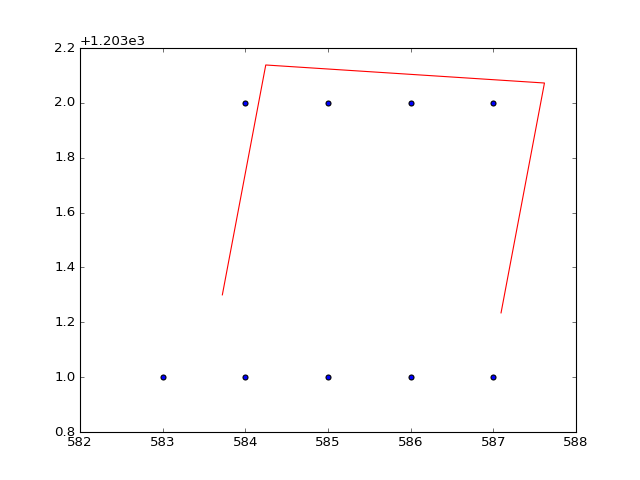

In [181]:
plt.scatter(nf[:,0],nf[:,1])
plt.plot(xy[:,0],xy[:,1],c='r')
plt.show()